In [5]:
import glob
import cycler

import numpy as np
from matplotlib import pyplot as plt

The below shows the accuracy of the log-normal mean in estimating total ionization from primary ionizations in a uniform electric field. At various field strengths, $30$ simulations were run until total ionizations reached $10$, $100$, or $1000$. The log-normal mean of the simulated primary ionizations matches the total number closely.

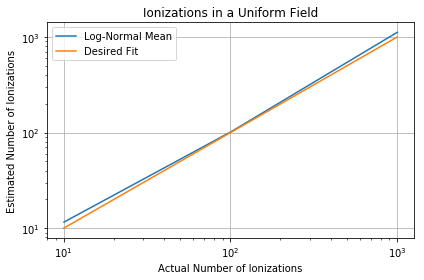

In [6]:
# plt.rcParams['font.size'] = 14
# plt.rcParams['font.family'] = 'serif'
# fig = plt.figure(figsize=(6, 6))

est_vals = [[], [], []]

x, y = [], []

for i, m in enumerate([10, 100, 1000]):
    ionized = []
    child_ions = []
    est_ionized = []
    
    for file in glob.glob(f'ion-est-uni-fields/{m}/*.txt'):
        _t, _x, _y, _z, _ke, _drift, _ionized, _child_ions = np.loadtxt(file, delimiter=',', unpack=True, ndmin=1)
        est_vals[i].append(2**_child_ions)
        ionized.append(_ionized)
        
    mu = np.mean(np.log(est_vals[i]))
    var = np.var(np.log(est_vals[i]))
    
    avg_est_ionized = np.exp(mu + 0.5 * var)
    avg_ionized = np.mean(ionized)
    
    x.append(avg_ionized)
    y.append(avg_est_ionized)
    
plt.plot(x, y, label='Log-Normal Mean')

x = np.logspace(1, 3, 10)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Actual Number of Ionizations')
plt.ylabel('Estimated Number of Ionizations')
plt.title('Ionizations in a Uniform Field')

plt.plot(x, x, label='Desired Fit')

plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

# plt.savefig('ionizations_in_uni_field.pdf', bbox_inches='tight')

The below displays the above data in a different way, again illustrating the accuracy of the log-normal mean.

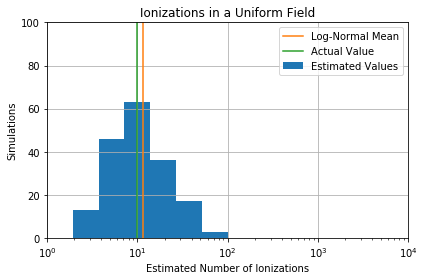

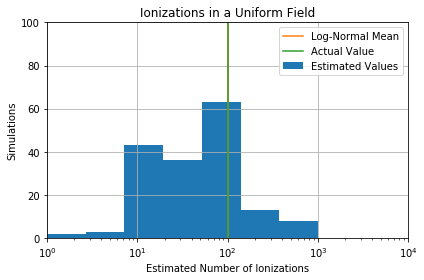

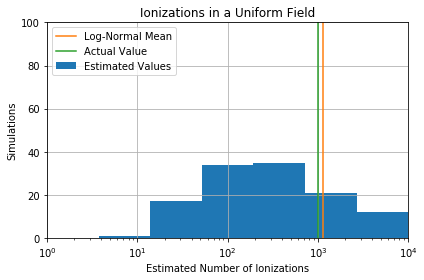

In [11]:
for i in range(3):
    # plt.rcParams['font.size'] = 14
    # plt.rcParams['font.family'] = 'serif'
    # fig = plt.figure(figsize=(6, 6))
    
    plt.hist(est_vals[i], rwidth=0.9, bins=np.logspace(0, i + 2, 8), label='Estimated Values', histtype='stepfilled')
    
    mu = np.mean(np.log(est_vals[i]))
    var = np.var(np.log(est_vals[i]))
    avg_est_ionized = np.exp(mu + 0.5 * var)
    
    plt.plot([avg_est_ionized, avg_est_ionized], [0, 100], label='Log-Normal Mean')
    plt.plot([10**(i+1), 10**(i+1)], [0, 100], label='Actual Value')
    
    plt.xlabel('Estimated Number of Ionizations')
    plt.ylabel('Simulations')
    plt.title(f'Ionizations in a Uniform Field')

    plt.xlim(1, 10e3)
    plt.ylim(0, 1e2)
    plt.xscale('log')
    
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # num_elecs = 10**(i + 1)
    # plt.savefig(f'ionizations_in_uni_field_dist_{num_elecs}.pdf', bbox_inches='tight')